In [1]:
from __future__ import division
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# __Task #1__

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. 

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [2]:
n = 100
prob = 0.75

F_H0 = stats.binom(n, prob)

In [6]:
stats.binom?

<BarContainer object of 101 artists>

(60.0, 90.0)

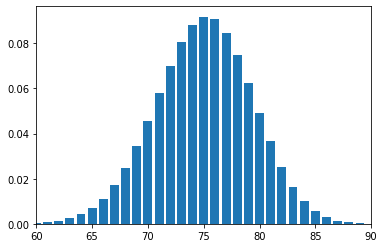

In [8]:
x = np.linspace(0,100,101)

plt.bar(x, F_H0.pmf(x), align = 'center')
plt.xlim(60, 90) 
plt.show()

In [4]:
print('p-value: %.4f' % stats.binom_test(67, 100, prob))

p-value: 0.0822


In [9]:
stats.binom_test?

# __Task #2__

Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты./

In [13]:
print('p-value: %.4f' % stats.binom_test(22, 50, prob))

p-value: 0.0000


# __Task #3__

he Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [16]:
data = pd.read_csv("pines.txt", delimiter = '\t')
data

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4
...,...,...
579,169.1,160.0
580,162.5,157.3
581,156.7,155.3
582,154.1,150.8


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sn      584 non-null    float64
 1   we      584 non-null    float64
dtypes: float64(2)
memory usage: 9.2 KB


In [17]:
data.describe()

,sn,we
count,584.000000,584.000000
mean,98.735274,113.829281
std,56.523154,49.810725
min,0.000000,0.000000
25%,52.050000,79.125000
50%,101.450000,121.900000
75%,149.400000,149.725000
max,200.000000,200.000000


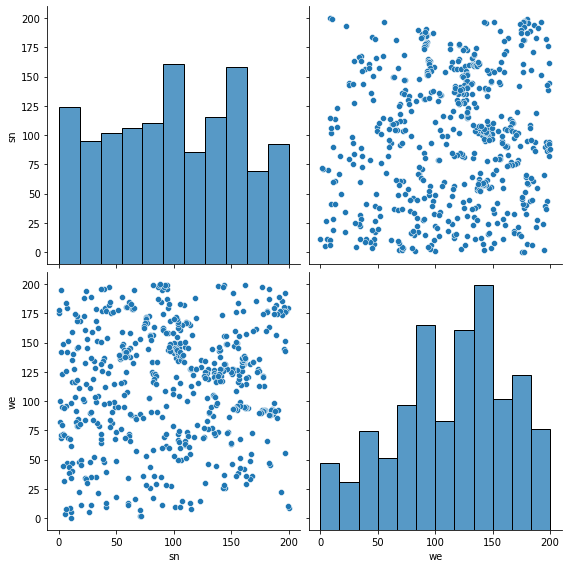

In [21]:
sns.pairplot(data, height = 4);

In [22]:
stats.binned_statistic_2d?

In [27]:
sn_num, we_num = 5, 5

trees_bins = stats.binned_statistic_2d(data.sn, data.we, None, statistic='count', bins=[sn_num, we_num])
print(trees_bins)
print(len(trees_bins.binnumber))

BinnedStatistic2dResult(statistic=array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]]), x_edge=array([  0.,  40.,  80., 120., 160., 200.]), y_edge=array([  0.,  40.,  80., 120., 160., 200.]), binnumber=array([36, 36, 36, 36, 37, 37, 37, 37, 36, 36, 36, 29, 30, 29, 30, 29, 29,
       29, 29, 29, 22, 22, 22, 22, 22, 29, 30, 30, 23, 23, 22,  8,  8,  8,
        8,  8,  8,  8, 15, 15,  8, 15, 15,  9,  9,  9,  9,  9,  9,  9,  9,
        8,  8,  9,  9,  9,  8,  8,  8,  8,  9,  9, 16, 16, 17, 16, 17, 17,
       17,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 17, 17, 10, 10, 10, 10,
       10, 10, 10, 24, 24, 23, 23, 23, 23, 24, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 30, 23, 23, 23, 23, 30, 30, 23, 23, 30, 30, 31, 30, 30,
       30, 22, 22, 22, 15, 22, 22, 22, 15, 15, 16, 16, 15, 15, 15, 15, 15,
       15, 15, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,  8,  8,  8,
     

In [26]:
trees_squares_num = trees_bins.statistic
trees_squares_num
trees_bins.x_edge
trees_bins.y_edge

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

array([  0.,  40.,  80., 120., 160., 200.])

array([  0.,  40.,  80., 120., 160., 200.])

In [28]:
mean_trees_num = np.sum(trees_squares_num) / 25
print(mean_trees_num)

23.36


# __Task #4,5__

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [32]:
trees_squares_num.flatten?

In [33]:
stats.chisquare?

In [29]:
stats.chisquare(trees_squares_num.flatten(), ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

Достигаемый уровень значимости меньше установленного уровня значимости в 0,05, а значит гипотеза о том, что распределение носит равномерный характер - отвергается